# MODULE 2: GROCERIES E-COMMERCE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.style.use("ggplot")

### PULLING THE DATASETS

In [2]:
data_path = "/home/unai/datasets/groceries/"

In [3]:
orders = pd.read_parquet(f"{data_path}/orders.parquet")
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8773 entries, 10 to 64538
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              8773 non-null   int64         
 1   user_id         8773 non-null   object        
 2   created_at      8773 non-null   datetime64[us]
 3   order_date      8773 non-null   datetime64[us]
 4   user_order_seq  8773 non-null   int64         
 5   ordered_items   8773 non-null   object        
dtypes: datetime64[us](2), int64(2), object(2)
memory usage: 479.8+ KB


In [4]:
users = pd.read_parquet(f"{data_path}/users.parquet")
users.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4983 entries, 2160 to 3360
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4983 non-null   object 
 1   user_segment           4983 non-null   object 
 2   user_nuts1             4932 non-null   object 
 3   first_ordered_at       4983 non-null   object 
 4   customer_cohort_month  4983 non-null   object 
 5   count_people           325 non-null    float64
 6   count_adults           325 non-null    float64
 7   count_children         325 non-null    float64
 8   count_babies           325 non-null    float64
 9   count_pets             325 non-null    float64
dtypes: float64(5), object(5)
memory usage: 428.2+ KB


In [5]:
regulars = pd.read_parquet(f"{data_path}/regulars.parquet")
regulars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), int64(1), object(1)
memory usage: 565.8+ KB


In [6]:
inventory = pd.read_parquet(f"{data_path}/inventory.parquet")
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   variant_id        1733 non-null   int64  
 1   price             1733 non-null   float64
 2   compare_at_price  1733 non-null   float64
 3   vendor            1733 non-null   object 
 4   product_type      1733 non-null   object 
 5   tags              1733 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 81.4+ KB


In [7]:
abandoned_carts = pd.read_parquet(f"{data_path}/abandoned_carts.parquet")
abandoned_carts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70050
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          5457 non-null   int64         
 1   user_id     5457 non-null   object        
 2   created_at  5457 non-null   datetime64[us]
 3   variant_id  5457 non-null   object        
dtypes: datetime64[us](1), int64(1), object(2)
memory usage: 213.2+ KB


#### 1. REGULARS

In [8]:
number_of_users = len(users)
percentage = regulars.user_id.nunique() * 100 / number_of_users
print(f"The number of users that create regular items is of {round(percentage,2)}%")

The number of users that create regular items is of 29.06%


In [9]:
users_with_regulars = users[users.user_id.isin(regulars.user_id.unique())]
users_regulars = users_with_regulars.merge(regulars, on='user_id', how='left')
users_regulars = users_regulars.merge(inventory, on='variant_id', how='left')
users_regulars.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,variant_id,created_at,price,compare_at_price,vendor,product_type,tags
0,ce6ca649c21f4eec31ed7489f74743e4fc756c0805c3f8...,Proposition,UKH,2020-12-21 10:33:30,2020-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,34079207686276,2020-12-28 12:37:56,4.69,4.85,nutella,spreads,[jam-sweet-spreads]
1,ce6ca649c21f4eec31ed7489f74743e4fc756c0805c3f8...,Proposition,UKH,2020-12-21 10:33:30,2020-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,34284955336836,2020-12-28 12:37:56,2.79,2.85,carex,hand-soap-sanitisers,"[hand-soap, refills]"
2,ce6ca649c21f4eec31ed7489f74743e4fc756c0805c3f8...,Proposition,UKH,2020-12-21 10:33:30,2020-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,34284954124420,2020-12-28 12:37:56,NaN,NaN,NaN,NaN,NaN
3,ce6ca649c21f4eec31ed7489f74743e4fc756c0805c3f8...,Proposition,UKH,2020-12-21 10:33:30,2020-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,34284954321028,2020-12-28 12:37:56,2.09,2.19,bluedragon,condiments-dressings,"[gluten-free, table-sauces, vegan]"
4,ce6ca649c21f4eec31ed7489f74743e4fc756c0805c3f8...,Proposition,UKH,2020-12-21 10:33:30,2020-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,34436055203972,2020-12-28 12:37:56,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Top 25 product types added as regulars')

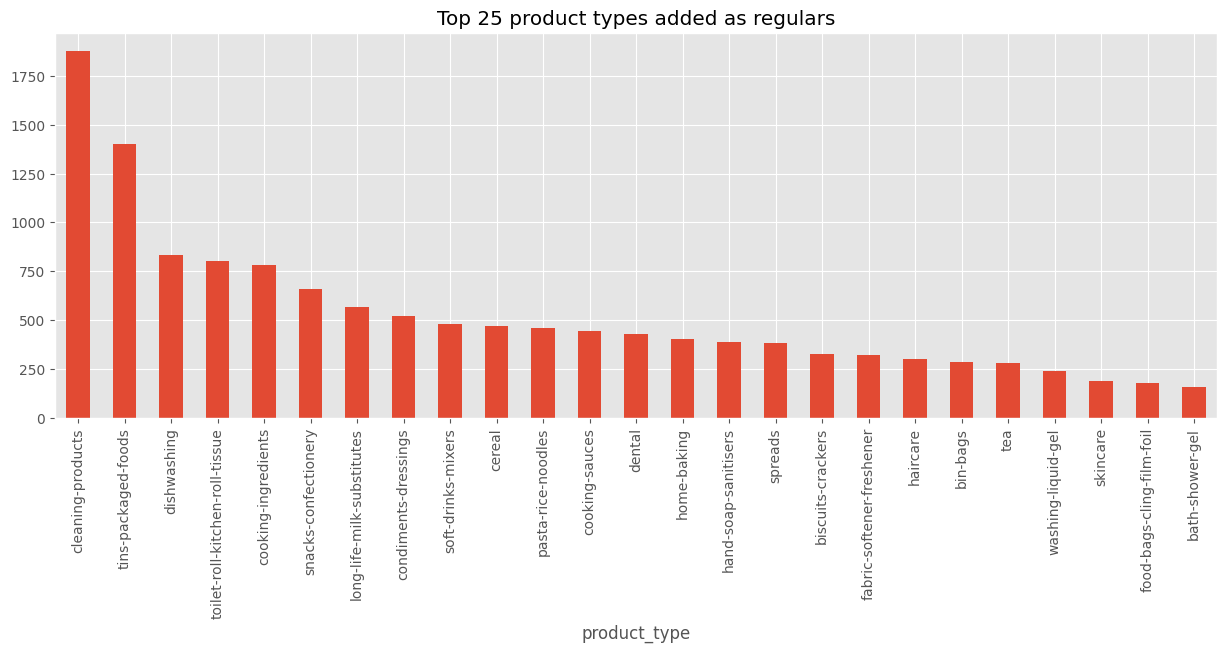

In [10]:
users_regulars['product_type'].value_counts().head(25).plot(kind='bar', figsize=(15, 5))
plt.title(f'Top 25 product types added as regulars')

In [11]:
order_items = orders.explode('ordered_items').rename({'ordered_items': 'variant_id'}, axis=1) 
order_items_info = order_items.merge(inventory, on='variant_id', how='left')

In [12]:
users_with_regorders = order_items[order_items.user_id.isin(regulars.user_id.unique())].reset_index(drop=True)
users_with_regorders.head()

,id,user_id,created_at,order_date,user_order_seq,variant_id
0,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618849693828
1,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618860179588
2,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618874040452
3,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618907005060
4,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618907005060


In [13]:
regulars_ordered = users_regulars[users_regulars[['user_id', 'variant_id']].apply(tuple, 1).isin(users_with_regorders[['user_id', 'variant_id']].apply(tuple, 1)) == True]
regulars_not_ordered = users_regulars[users_regulars[['user_id', 'variant_id']].apply(tuple, 1).isin(users_with_regorders[['user_id', 'variant_id']].apply(tuple, 1)) == False]

In [14]:
len(regulars_ordered)/len(users_regulars)*100

58.07235570284451

In [15]:
regulars_ordered.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,variant_id,created_at,price,compare_at_price,vendor,product_type,tags
1,ce6ca649c21f4eec31ed7489f74743e4fc756c0805c3f8...,Proposition,UKH,2020-12-21 10:33:30,2020-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,34284955336836,2020-12-28 12:37:56,2.79,2.85,carex,hand-soap-sanitisers,"[hand-soap, refills]"
3,ce6ca649c21f4eec31ed7489f74743e4fc756c0805c3f8...,Proposition,UKH,2020-12-21 10:33:30,2020-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,34284954321028,2020-12-28 12:37:56,2.09,2.19,bluedragon,condiments-dressings,"[gluten-free, table-sauces, vegan]"
8,ce6ca649c21f4eec31ed7489f74743e4fc756c0805c3f8...,Proposition,UKH,2020-12-21 10:33:30,2020-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,33826472984708,2020-12-28 12:37:56,2.49,3.00,viakal,cleaning-products,"[bathroom-limescale-cleaner, specialist-cleaning]"
20,ce6ca649c21f4eec31ed7489f74743e4fc756c0805c3f8...,Proposition,UKH,2020-12-21 10:33:30,2020-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,34368924057732,2020-12-28 12:37:56,2.19,2.39,cardinis,condiments-dressings,[salad-dressings]
32,ce6ca649c21f4eec31ed7489f74743e4fc756c0805c3f8...,Proposition,UKH,2020-12-21 10:33:30,2020-12-01 00:00:00,NaN,NaN,NaN,NaN,NaN,33826456666244,2020-12-28 12:37:56,3.09,3.39,vego,spreads,"[gluten-free, jam-sweet-spreads, vegan]"


In [16]:
regulars_ordered.describe()

,count_people,count_adults,count_children,count_babies,count_pets,variant_id,created_at,price,compare_at_price
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000,1.051400e+04,10514,8969.000000,8969.000000
mean,3.155022,2.241048,0.857642,0.056332,0.834498,3.493069e+13,2021-08-06 09:12:03.369412,5.148893,5.928017
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.361529e+13,2020-04-30 13:09:27,0.570000,0.750000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,3.382643e+13,2021-03-13 17:46:55,2.490000,2.850000
50%,3.000000,2.000000,0.000000,0.000000,1.000000,3.419850e+13,2021-09-25 19:05:43,3.690000,4.000000
75%,4.000000,3.000000,2.000000,0.000000,1.000000,3.443616e+13,2022-01-10 15:44:16,5.990000,7.000000
max,7.000000,7.000000,3.000000,2.000000,6.000000,4.007994e+13,2022-03-14 07:49:24,59.990000,60.000000
std,1.416986,1.065554,0.983834,0.245299,1.075213,2.008217e+12,NaN,4.366037,5.163580


In [17]:
regulars_not_ordered.describe()

,count_people,count_adults,count_children,count_babies,count_pets,variant_id,created_at,price,compare_at_price
count,1620.000000,1620.000000,1620.000000,1620.000000,1620.000000,7.591000e+03,7591,6065.000000,6065.000000
mean,3.247531,2.218519,0.994444,0.034568,0.620988,3.538194e+13,2021-08-27 04:17:35.208141,5.212122,6.013522
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.361527e+13,2020-04-30 13:09:27,0.570000,0.750000
25%,2.000000,2.000000,0.000000,0.000000,0.000000,3.382646e+13,2021-04-03 07:00:02,1.990000,2.500000
50%,4.000000,2.000000,1.000000,0.000000,0.000000,3.427657e+13,2021-11-12 10:24:18,3.190000,3.850000
75%,4.000000,3.000000,2.000000,0.000000,1.000000,3.454300e+13,2022-01-19 14:33:06,5.890000,6.990000
max,7.000000,7.000000,3.000000,1.000000,6.000000,4.013362e+13,2022-03-14 07:49:24,49.990000,50.000000
std,1.262306,0.942656,0.890187,0.182739,0.765729,2.353794e+12,NaN,5.479522,6.325011


In [18]:
regulars_ordered.groupby(['variant_id'])['user_id'].unique()

variant_id
33615294398596    [51bc89eb83c0d3c049f45d4935207f2d39e80b0293152...
33618835243140    [bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f...
33618835964036    [bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f...
33618849693828    [62e271062eb827e411bd73941178d29b022f5f2de9d37...
33618860179588    [62e271062eb827e411bd73941178d29b022f5f2de9d37...
                                        ...                        
40013457588356    [20a41b8fa616484b39812aaa377ea1b53247f6941c058...
40023686054020    [0af18ff445827d3b373d87754ed90db1fe4924525d552...
40079944417412    [7b8bf6e80188388f3144b389a446e717d640047af8d25...
40079944450180    [7b8bf6e80188388f3144b389a446e717d640047af8d25...
40079944548484    [8a29b9a2fd8feb4a5fe79d8ac63473ac6a7eee66469ee...
Name: user_id, Length: 1357, dtype: object

In [19]:
regulars_ordered.groupby(['user_id'])['variant_id'].nunique().sort_values(ascending=False)

user_id
27c2c38327ba83867c6291ee6bd0c35548edd256ed51c9e1a530e15343ab53424ef69712a0ad5cb454a841e168102a6334bb3fa24153a27d7451c771decfdd8e    72
11c967ad95d1e3a8f9767612e2f084aad75832cf019f8a232279b0f3b15388ee906988eea6ecee027ef43a5acb69b6c9290cc8ff5a322853c8734cfc3b719a55    54
b9452236b95ed2b60d18404a1e8b5aa4652bc3c4518a6ebd205e82478f657f0b874d90b98710d6cea7eb3c3d8ac7309687e12a34ec2a4f26cc7015df6c09d0a5    49
c6c9f20dc25457e652905e3e0f880cd7c7ff0d6077b445b8fd9a9cbb1f088492ae82cce0ccf2ebd583f52f2c7df4fb03d2a712fe2a28ed7e41e211f7becae08a    48
0c800ed849c49fac8039db58526a46c49da2c492a0c3b3f3f54c7cf469ba031007d079447ced0002ad37bc0040a335d2d8d9d72b4bab62c10c573cd5d33bc3fb    47
                                                                                                                                    ..
58536c5e8e77063d22e6bd52c6b5d96716e0408cc8e432b04a1043fa1a913369c0f63516fb68fdb1893731944b2c5c67751d2587dbc8bb0404a2543d68bc8376     1
bce6c42c337891cad84ae239be824285b4b7b7d6a59471d

In [20]:
regulars_ordered = users_with_regorders[['user_id', 'variant_id']].apply(tuple, 1).isin(users_regulars[['user_id', 'variant_id']].apply(tuple, 1))
regulars_ordered = users_with_regorders[regulars_ordered == True]
len(regulars_ordered)/len(order_items)*100 #ordered items that where regulars

17.491061338668743

**Insights:**
1. Only the 29.06% pf the users use the regulars option to ease their orders. However, 17.5% of the items ordered in the history of the company where added to regulars by the user
2. From the items that have been added to regulars a 58% of them where finally ordered. However, it can´t be seen any difference between the users-items info of the ones being ordered and the ones not being ordered.
3. Out of the top 4 product types added as regulars by users, 3 of them are related with cleaning products.

#### 2. ABANDONED

In [21]:
abandoned_items = abandoned_carts.explode('variant_id')
abandoned_items = abandoned_items.merge(inventory, on='variant_id', how='left')
abandoned_items.head()

,id,user_id,created_at,variant_id,price,compare_at_price,vendor,product_type,tags
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,33826459287684,NaN,NaN,NaN,NaN,NaN
1,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,33826457616516,NaN,NaN,NaN,NaN,NaN
2,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,33667192127620,NaN,NaN,NaN,NaN,NaN
3,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,33826412331140,NaN,NaN,NaN,NaN,NaN
4,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,33826472558724,3.99,4.09,profusion,cooking-ingredients,"[salt-pepper, vegan]"


In [22]:
inventory.head()

,variant_id,price,compare_at_price,vendor,product_type,tags
0,39587297165444,3.09,3.15,heinz,condiments-dressings,"[table-sauces, vegan]"
1,34370361229444,4.99,5.50,whogivesacrap,toilet-roll-kitchen-roll-tissue,"[b-corp, eco, toilet-rolls]"
2,34284951863428,3.69,3.99,plenty,toilet-roll-kitchen-roll-tissue,[kitchen-roll]
3,33667283583108,1.79,1.99,thecheekypanda,toilet-roll-kitchen-roll-tissue,"[b-corp, cruelty-free, eco, tissue, vegan]"
4,33803537973380,1.99,2.09,colgate,dental,[dental-accessories]


In [23]:
most_abandoned_items = abandoned_items.groupby(['variant_id'])['id'].nunique().sort_values(ascending=False).head(50).index[0:50]
inventory[inventory['variant_id'].isin(most_abandoned_items)]['product_type'].value_counts()

product_type
toilet-roll-kitchen-roll-tissue    7
tins-packaged-foods                7
cleaning-products                  5
dishwashing                        4
fabric-softener-freshener          4
washing-powder                     2
soft-drinks-mixers                 2
washing-capsules                   2
long-life-milk-substitutes         2
washing-liquid-gel                 1
biscuits-crackers                  1
condiments-dressings               1
cereal                             1
cooking-sauces                     1
cooking-ingredients                1
hand-soap-sanitisers               1
haircare                           1
dental                             1
skincare                           1
spreads                            1
Name: count, dtype: int64

In [24]:
def compute_orders_size_and_value(x):
    return pd.Series({
        'order_size': len(x),
        'n_unique_products': x.variant_id.nunique(),
        'order_value': x.price.sum(),
        'ratio_missing_prod_data': x.price.isna().sum() / len(x)
    })

In [25]:
orders_size = order_items_info.groupby(['id']).apply(compute_orders_size_and_value).reset_index()
orders_size.head()

,id,order_size,n_unique_products,order_value,ratio_missing_prod_data
0,2204073066628,14.0,12.0,0.00,1.0
1,2204707520644,25.0,23.0,0.00,1.0
2,2204838822020,15.0,13.0,0.00,1.0
3,2208967852164,10.0,9.0,0.00,1.0
4,2215889436804,10.0,8.0,8.38,0.8


In [26]:
abandoned_size = abandoned_items.groupby(['id']).apply(compute_orders_size_and_value).reset_index()
abandoned_size.head()

,id,order_size,n_unique_products,order_value,ratio_missing_prod_data
0,12858560217220,19.0,19.0,32.04,0.526316
1,20352449839236,9.0,9.0,20.41,0.000000
2,20478401413252,20.0,20.0,82.32,0.100000
3,20481783103620,13.0,13.0,48.38,0.076923
4,20485321687172,3.0,3.0,22.67,0.000000


In [27]:
orders_size.drop(['id'], axis=1).describe()

,order_size,n_unique_products,order_value,ratio_missing_prod_data
count,8773.000000,8773.000000,8773.000000,8773.000000
mean,12.305711,9.553402,55.832173,0.143926
std,6.839507,6.338529,24.316070,0.150902
min,1.000000,1.000000,0.000000,0.000000
25%,8.000000,5.000000,44.250000,0.047619
50%,11.000000,9.000000,51.860000,0.111111
75%,15.000000,13.000000,60.590000,0.200000
max,114.000000,70.000000,319.800000,1.000000


In [28]:
abandoned_size.drop(['id'], axis=1).describe()

,order_size,n_unique_products,order_value,ratio_missing_prod_data
count,5457.000000,5457.000000,5457.000000,5457.000000
mean,5.656771,5.656771,30.316320,0.053903
std,4.720567,4.720567,21.473383,0.141188
min,1.000000,1.000000,0.000000,0.000000
25%,2.000000,2.000000,14.140000,0.000000
50%,4.000000,4.000000,26.870000,0.000000
75%,8.000000,8.000000,42.210000,0.000000
max,42.000000,42.000000,311.790000,1.000000


In [29]:
users_abanonding = abandoned_carts.merge(users, on='user_id', how='left')
users_abanonding.head()

,id,user_id,created_at,variant_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
0,12858560217220,5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...,2020-05-20 13:53:24,"[33826459287684, 33826457616516, 3366719212762...",Proposition,UKF,2020-05-25 11:56:48,2020-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN
1,20352449839236,9d6187545c005d39e44d0456d87790db18611d7c7379bd...,2021-06-27 05:24:13,"[34415988179076, 34037940158596, 3450282236326...",Top Up,UKD,2022-01-19 20:39:49,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN
2,20478401413252,e83fb0273d70c37a2968fee107113698fd4f389c442c0b...,2021-07-18 08:23:49,"[34543001337988, 34037939372164, 3411360609088...",Proposition,UKC,2021-07-18 09:23:38,2021-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN
3,20481783103620,10c42e10e530284b7c7c50f3a23a98726d5747b8128084...,2021-07-18 21:29:36,"[33667268116612, 34037940224132, 3443605520397...",Proposition,UKI,2021-07-18 22:29:26,2021-07-01 00:00:00,2.0,2.0,0.0,0.0,0.0
4,20485321687172,d9989439524b3f6fc4f41686d043f315fb408b954d6153...,2021-07-19 12:17:05,"[33667268083844, 34284950454404, 33973246886020]",Top Up,UKD,2021-03-30 11:09:30,2021-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN


In [30]:
users_abanonding['user_id'].value_counts().describe()

count    3439.000000
mean        1.586798
std         0.831996
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        10.000000
Name: count, dtype: float64

<Axes: xlabel='product_type'>

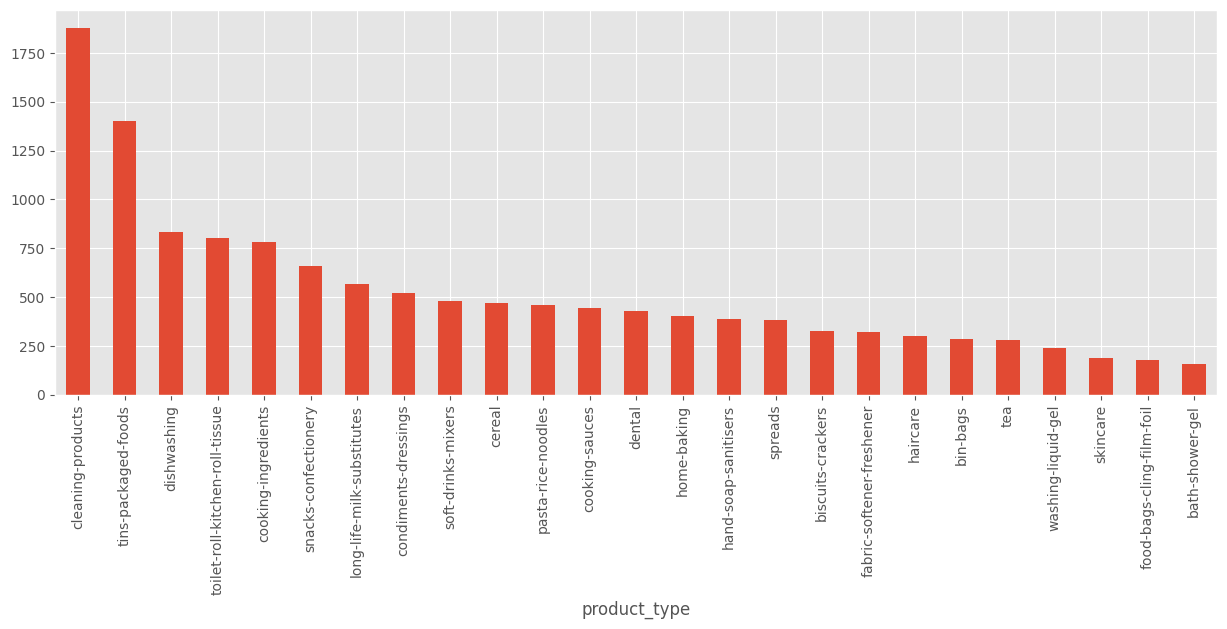

In [31]:
users_regulars['product_type'].value_counts().head(25).plot(kind='bar', figsize=(15, 5))

<Axes: xlabel='user_nuts1'>

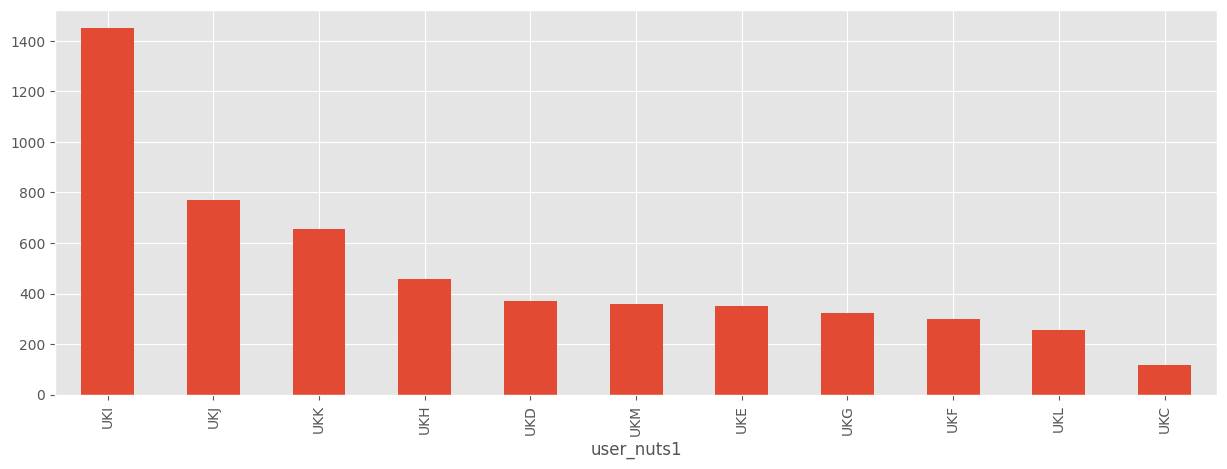

In [32]:
users_abanonding['user_nuts1'].value_counts().plot(kind='bar', figsize=(15, 5))

<Axes: xlabel='user_nuts1'>

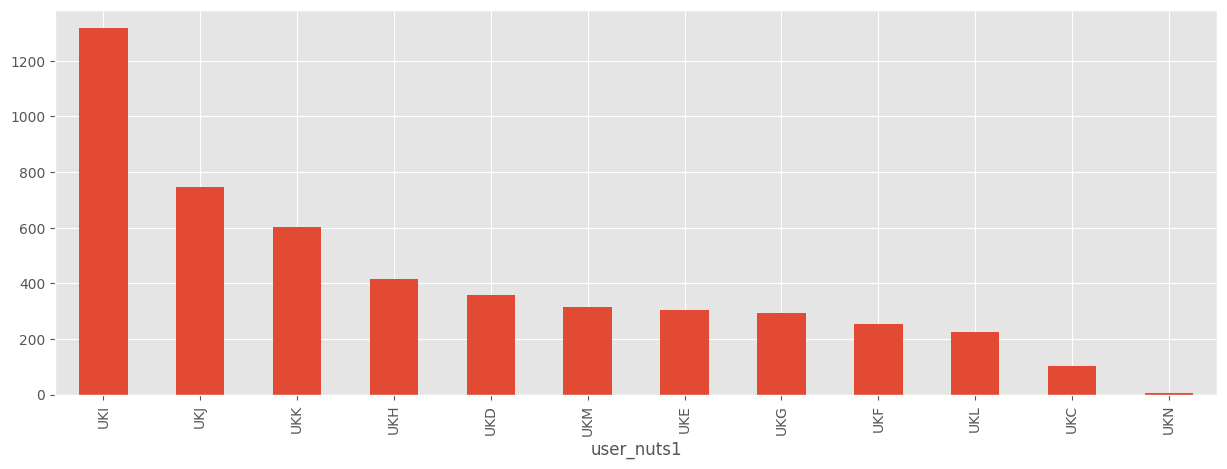

In [33]:
users['user_nuts1'].value_counts().plot(kind='bar', figsize=(15, 5))

**Insights:**
1. A user usually abandonds on one basket in his history.
2. The characteristics of the ordered baskets are quite different from the abandoned basket ones. The abandoned baskets have a mean price of 40% less than ordered basket mean price.
3. Clearly the users from UKI are more likely to abandon their baskets. However, the reason is becuase there are more users from thar region.

# EDA

In [34]:
box_builder_sample_data = '/home/unai/datasets/feature_frame.csv'
bb_df = pd.read_csv(box_builder_sample_data)
bb_df.head()

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
0,33826472919172,ricepastapulses,2807985930372,3482464092292,2020-10-05 16:46:19,2020-10-05 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
1,33826472919172,ricepastapulses,2808027644036,3466586718340,2020-10-05 17:59:51,2020-10-05 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
2,33826472919172,ricepastapulses,2808099078276,3481384026244,2020-10-05 20:08:53,2020-10-05 00:00:00,4,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
3,33826472919172,ricepastapulses,2808393957508,3291363377284,2020-10-06 08:57:59,2020-10-06 00:00:00,2,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618
4,33826472919172,ricepastapulses,2808429314180,3537167515780,2020-10-06 10:37:05,2020-10-06 00:00:00,3,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.27618


In [35]:
bb_df.loc[lambda x: x.outcome > 0]

,variant_id,product_type,order_id,user_id,created_at,order_date,user_order_seq,outcome,ordered_before,abandoned_before,...,count_children,count_babies,count_pets,people_ex_baby,days_since_purchase_variant_id,avg_days_to_buy_variant_id,std_days_to_buy_variant_id,days_since_purchase_product_type,avg_days_to_buy_product_type,std_days_to_buy_product_type
24,33826472919172,ricepastapulses,2811116486788,3463900528772,2020-10-08 09:31:35,2020-10-08 00:00:00,5,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.276180
78,33826472919172,ricepastapulses,2816464388228,3781503156356,2020-10-14 15:28:26,2020-10-14 00:00:00,2,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,5.0,30.0,24.276180
142,33826472919172,ricepastapulses,2821889785988,3787000283268,2020-10-21 17:25:02,2020-10-21 00:00:00,2,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.276180
218,33826472919172,ricepastapulses,2827451138180,3519639879812,2020-10-29 11:24:52,2020-10-29 00:00:00,3,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,30.0,30.0,24.276180
239,33826472919172,ricepastapulses,2828980060292,3788931465348,2020-10-31 13:08:30,2020-10-31 00:00:00,3,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,42.0,31.134053,10.0,30.0,24.276180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2860253,34304342851716,airfreshener,2829039304836,3502816592004,2020-10-31 15:09:18,2020-10-31 00:00:00,3,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,47.0,31.017468,30.0,39.0,35.641908
2860261,34304342851716,airfreshener,2829221494916,3784403714180,2020-10-31 21:06:07,2020-10-31 00:00:00,2,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,47.0,31.017468,30.0,39.0,35.641908
2863549,33826433859716,floorcleanerpolish,2823601127556,3469897564292,2020-10-23 19:53:52,2020-10-23 00:00:00,2,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,82.0,44.243644,30.0,38.5,31.832738
2863654,33826433859716,floorcleanerpolish,2829871546500,3771764834436,2020-11-01 21:04:11,2020-11-01 00:00:00,3,1.0,0.0,0.0,...,0.0,0.0,0.0,2.0,33.0,82.0,44.243644,30.0,38.5,31.832738


In [36]:
bb_df.columns

Index(['variant_id', 'product_type', 'order_id', 'user_id', 'created_at',
       'order_date', 'user_order_seq', 'outcome', 'ordered_before',
       'abandoned_before', 'active_snoozed', 'set_as_regular',
       'normalised_price', 'discount_pct', 'vendor', 'global_popularity',
       'count_adults', 'count_children', 'count_babies', 'count_pets',
       'people_ex_baby', 'days_since_purchase_variant_id',
       'avg_days_to_buy_variant_id', 'std_days_to_buy_variant_id',
       'days_since_purchase_product_type', 'avg_days_to_buy_product_type',
       'std_days_to_buy_product_type'],
      dtype='object')

In [59]:
bb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2880549 entries, 0 to 2880548
Data columns (total 27 columns):
 #   Column                            Dtype  
---  ------                            -----  
 0   variant_id                        int64  
 1   product_type                      object 
 2   order_id                          int64  
 3   user_id                           int64  
 4   created_at                        object 
 5   order_date                        object 
 6   user_order_seq                    int64  
 7   outcome                           float64
 8   ordered_before                    float64
 9   abandoned_before                  float64
 10  active_snoozed                    float64
 11  set_as_regular                    float64
 12  normalised_price                  float64
 13  discount_pct                      float64
 14  vendor                            object 
 15  global_popularity                 float64
 16  count_adults                      fl

In [38]:
info_cols = ['variant_id', 'order_id', 'user_id', 'created_at', 'order_date']
label_col = 'outcome'
features_cols = [col for col in bb_df.columns if col not in info_cols + [label_col]]

categorical_cols = ['product_type', 'vendor']
binary_cols = ['ordered_before', 'abandoned_before', 'active_snoozed', 'set_as_regular']
numerical_cols = [col for col in features_cols if col not in categorical_cols + binary_cols]

In [39]:
bb_df[label_col].value_counts()

outcome
0.0    2847317
1.0      33232
Name: count, dtype: int64

In [40]:
for col in binary_cols:
    print(f"Value counts {col}: {bb_df[col].value_counts().to_dict()}")
    print(f"Mean outcome by {col} value: {bb_df.groupby(col)['outcome'].mean().to_dict()}")
    print(" --- ")

Value counts ordered_before: {0.0: 2819658, 1.0: 60891}
Mean outcome by ordered_before value: {0.0: 0.008223337723936732, 1.0: 0.1649669080816541}
 --- 
Value counts abandoned_before: {0.0: 2878794, 1.0: 1755}
Mean outcome by abandoned_before value: {0.0: 0.011106039542947498, 1.0: 0.717948717948718}
 --- 
Value counts active_snoozed: {0.0: 2873952, 1.0: 6597}
Mean outcome by active_snoozed value: {0.0: 0.011302554809544488, 1.0: 0.1135364559648325}
 --- 
Value counts set_as_regular: {0.0: 2870093, 1.0: 10456}
Mean outcome by set_as_regular value: {0.0: 0.010668992259135854, 1.0: 0.24971308339709258}
 --- 


<Axes: >

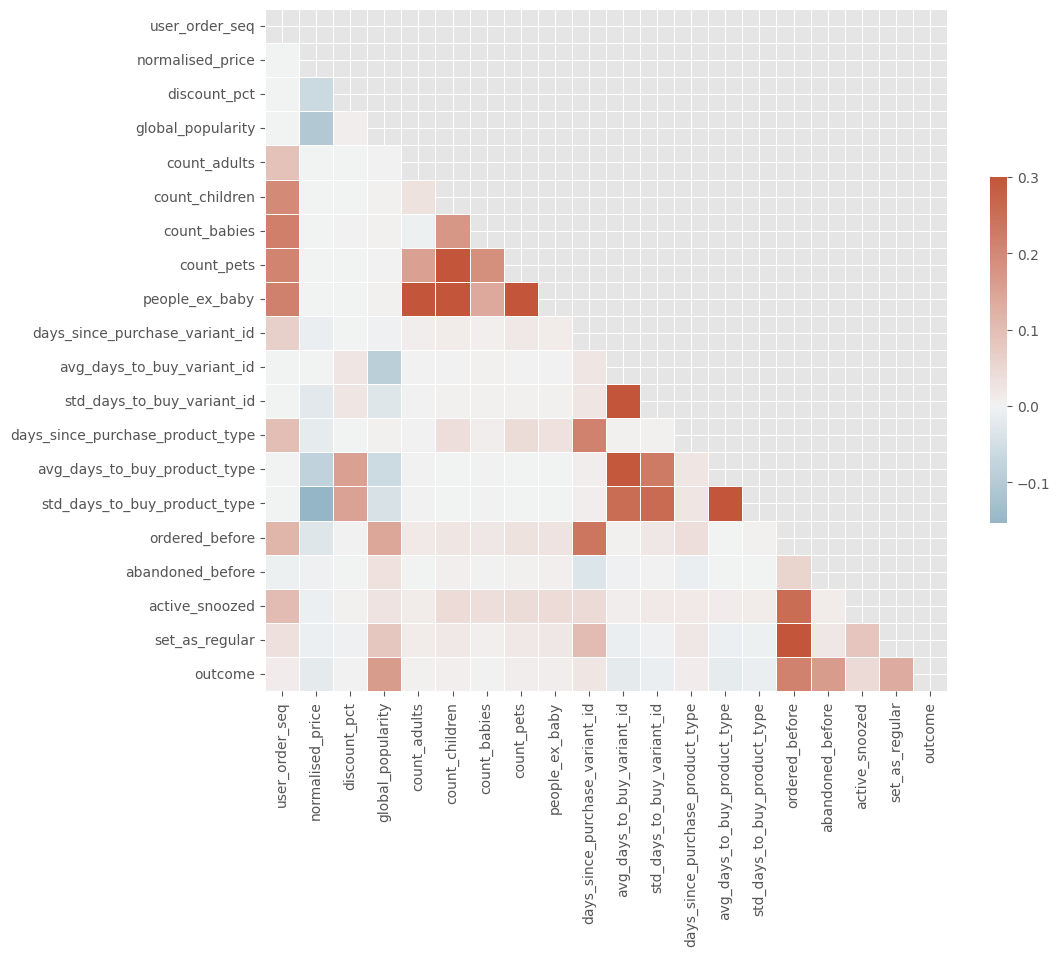

In [64]:
# Compute the correlation matrix
corr = bb_df[numerical_cols + binary_cols + [label_col]].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

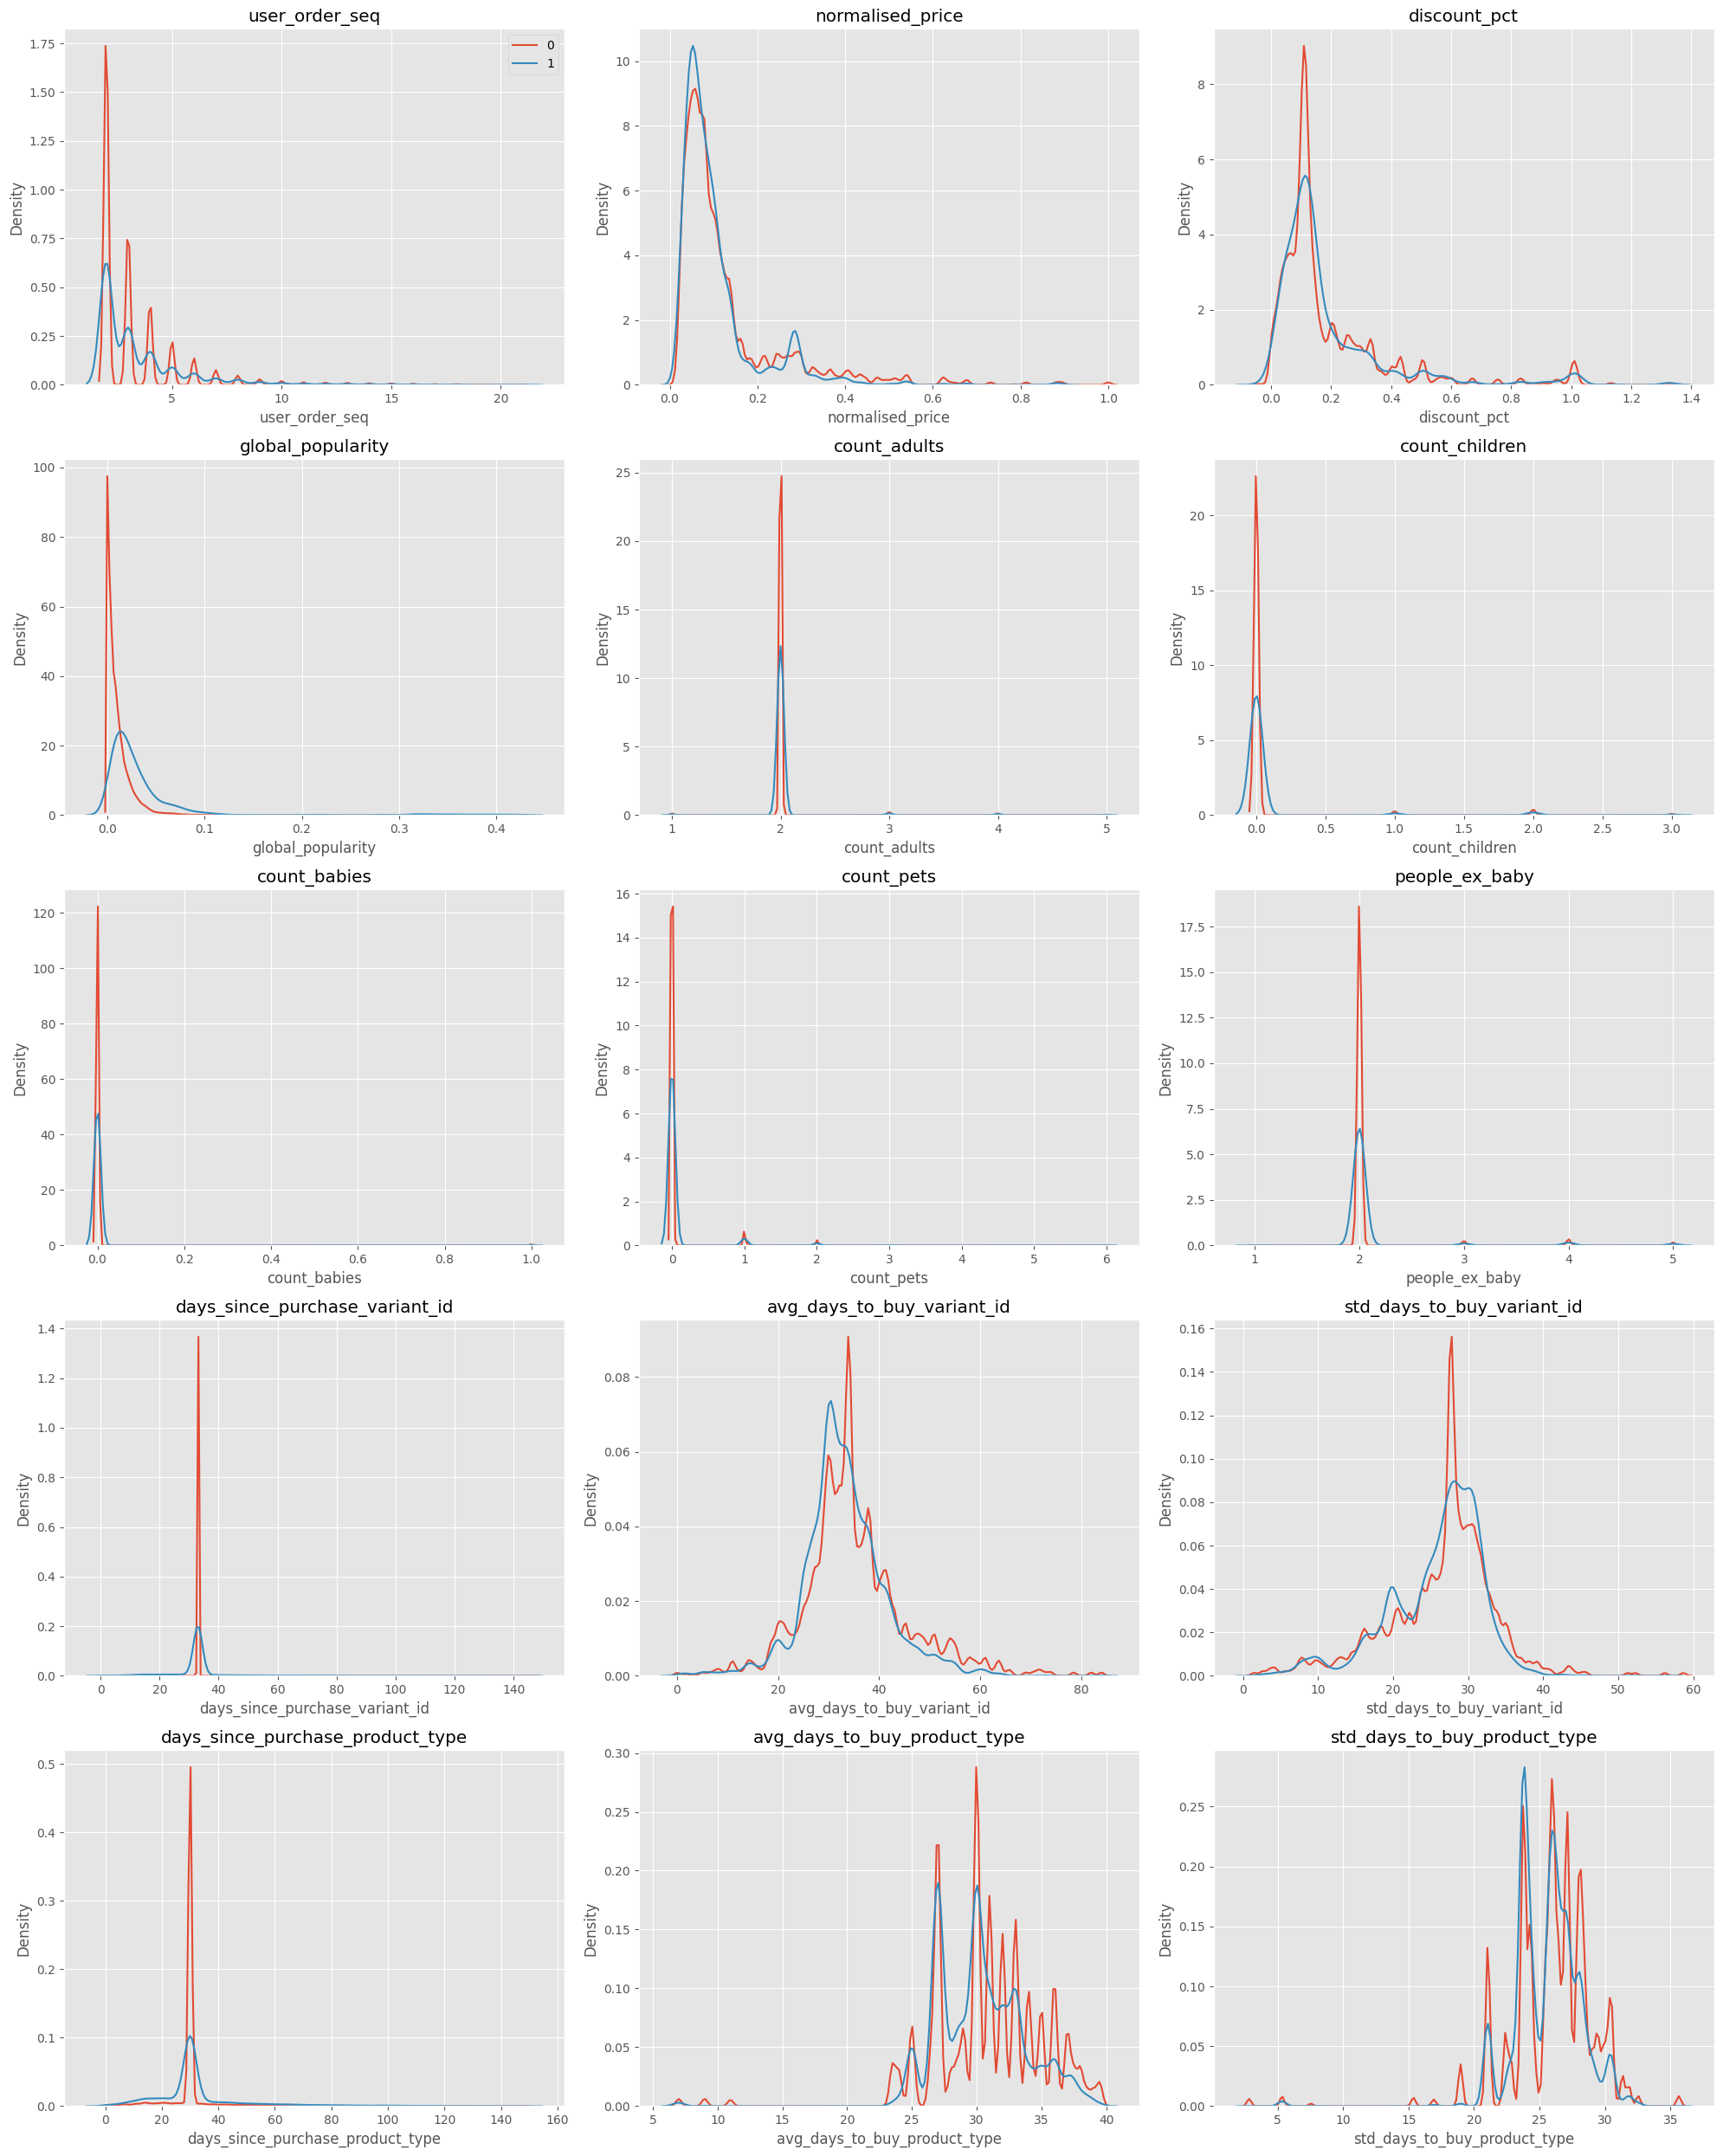

In [42]:
cols = 3
rows = int(np.ceil(len(numerical_cols) / cols))
fig, ax = plt.subplots(rows, cols, figsize=(20, 5*rows))
ax = ax.flatten()

for i, col in enumerate(numerical_cols):
    sns.kdeplot(bb_df.loc[lambda x: x.outcome == 0, col], label='0', ax=ax[i])
    sns.kdeplot(bb_df.loc[lambda x: x.outcome == 1, col], label='1', ax=ax[i])
    ax[i].set_title(col)
    
ax[0].legend()

plt.tight_layout()

In [43]:
bb_df[categorical_cols].describe()

,product_type,vendor
count,2880549,2880549
unique,62,264
top,tinspackagedfoods,biona
freq,226474,146828


**Insights:**
- There does not seem to be a linear relationship between the output variable and the input variables since the highest correlation is around 25%.
- Categorical variables have very high cardinality. We could use frequency encoding.